In [33]:
import json

In [34]:
# results = json.load(open("../results/aime_deepseek_qwen_14b_summ_base_sum_4iter_fresh/aime_deepseek_qwen_14b_summ_base_sum_4iter_fresh_20250508_171556/results.json"))
# results = json.load(open("../results/aime_deepseek_qwen_14b_summ_base_sum_4iter_rerun_merged/results.json"))
# results = json.load(open("../results/aime_deepseek_qwen_14b_baseline_answer_only_sum_4iter/aime_deepseek_qwen_14b_baseline_answer_only_sum_4iter_20250509_142151/results.json"))
# results = json.load(open("../results/aime_deepseek_qwen_14b_baseline_lastk_sum_4iter_fresh/aime_deepseek_qwen_14b_baseline_lastk_sum_4iter_fresh_20250508_223119/results.json"))
results = json.load(open("../results/aime_deepseek_r1_summ_base_sum_4iter_fresh/aime_deepseek_r1_summ_base_sum_4iter_fresh_20250508_173017/results.json"))

# model_name = "DeepSeek Qwen 14B"
model_name = "DeepSeek R1"

In [35]:
pids = set()
for j in results["results"]:
    pids.add(j["problem_id"])
len(pids)


60

In [36]:
full_results = json.load(open("../results/aime_deepseek_qwen_14b_summ_base_sum_4iter_fresh/aime_deepseek_qwen_14b_summ_base_sum_4iter_fresh_20250508_171556/results.json"))
full_pids = set()
for j in full_results["results"]:
    full_pids.add(j["problem_id"])
len(full_pids)
need2run = full_pids - pids

In [37]:
",".join(list(need2run))

''

In [38]:
problem_index = 0
iteration_number = 0

In [39]:
results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_summary'][-1]['total_token_usage']['completion_tokens']

192

In [40]:
total_tokens = 0
count = 0

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            total_tokens += tokens
            count += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

average_tokens = total_tokens / count if count > 0 else 0
print(f"Average completion tokens per summary: {average_tokens:.2f}")

Average completion tokens per summary: 443.72


/var/folders/8y/j9pbnmqj2t1bn5kv9ps9lg680000gn/T/ipykernel_14363/1163655696.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])


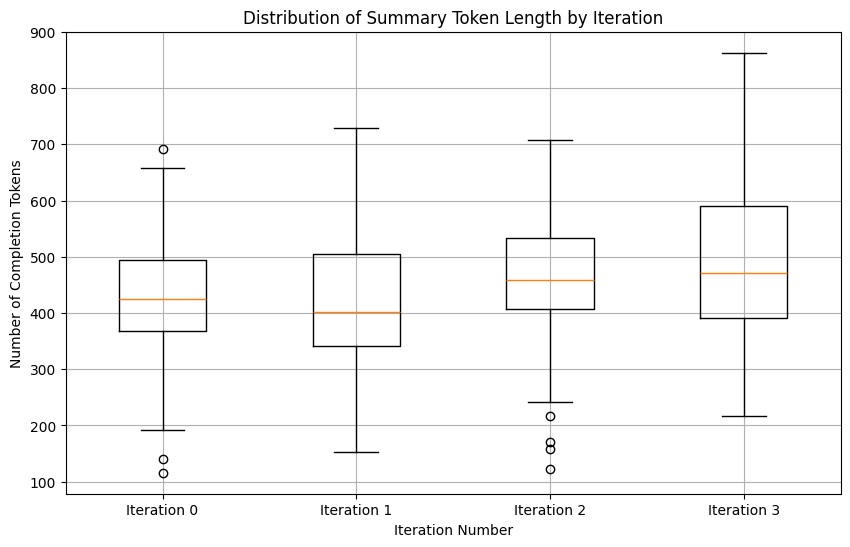

Average tokens for iteration 1: 414.00
Average tokens for iteration 2: 422.07
Average tokens for iteration 3: 456.02
Average tokens for iteration 4: 482.78


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create box plot
plt.figure(figsize=(10, 6))
box_data = [iter_tokens[i] for i in range(4)]
plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])
plt.title('Distribution of Summary Token Length by Iteration')
plt.xlabel('Iteration Number') 
plt.ylabel('Number of Completion Tokens')
plt.grid(True)
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average tokens for iteration {i+1}: {avg:.2f}")

reasoning

In [42]:
results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_reasoning'][-1]['total_token_usage']['completion_tokens']

3355

In [43]:
total_tokens = 0
count = 0

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            total_tokens += tokens
            count += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

average_tokens = total_tokens / count if count > 0 else 0
print(f"Average completion tokens per reasoning: {average_tokens:.2f}")

Average completion tokens per reasoning: 7413.88


/var/folders/8y/j9pbnmqj2t1bn5kv9ps9lg680000gn/T/ipykernel_14363/1491384652.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])


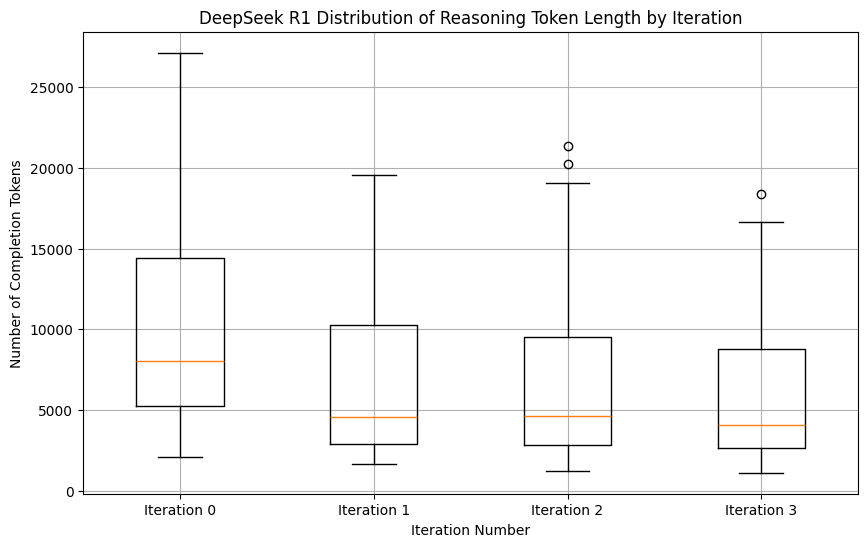

Average tokens for iteration 0: 10060.82
Average tokens for iteration 1: 6911.93
Average tokens for iteration 2: 6751.95
Average tokens for iteration 3: 5930.80


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create box plot
plt.figure(figsize=(10, 6))
box_data = [iter_tokens[i] for i in range(4)]
plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])
plt.title(f'{model_name + " "}Distribution of Reasoning Token Length by Iteration')
plt.xlabel('Iteration Number') 
plt.ylabel('Number of Completion Tokens')
plt.grid(True)
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average tokens for iteration {i}: {avg:.2f}")

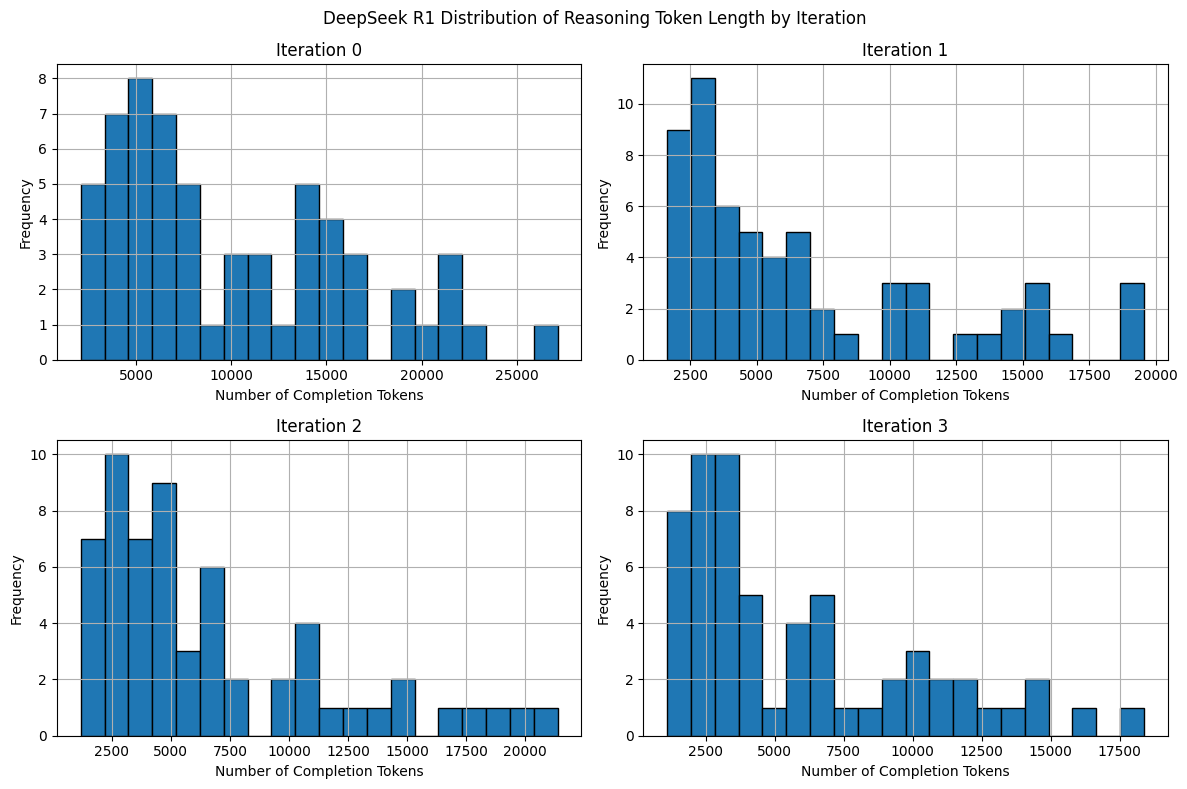

Average tokens for iteration 0: 10060.82
Average tokens for iteration 1: 6911.93
Average tokens for iteration 2: 6751.95
Average tokens for iteration 3: 5930.80


In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create histogram subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f'{model_name + " "}Distribution of Reasoning Token Length by Iteration')

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].hist(iter_tokens[i], bins=20, edgecolor='black')
    axes[row, col].set_title(f'Iteration {i}')
    axes[row, col].set_xlabel('Number of Completion Tokens')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average tokens for iteration {i}: {avg:.2f}")

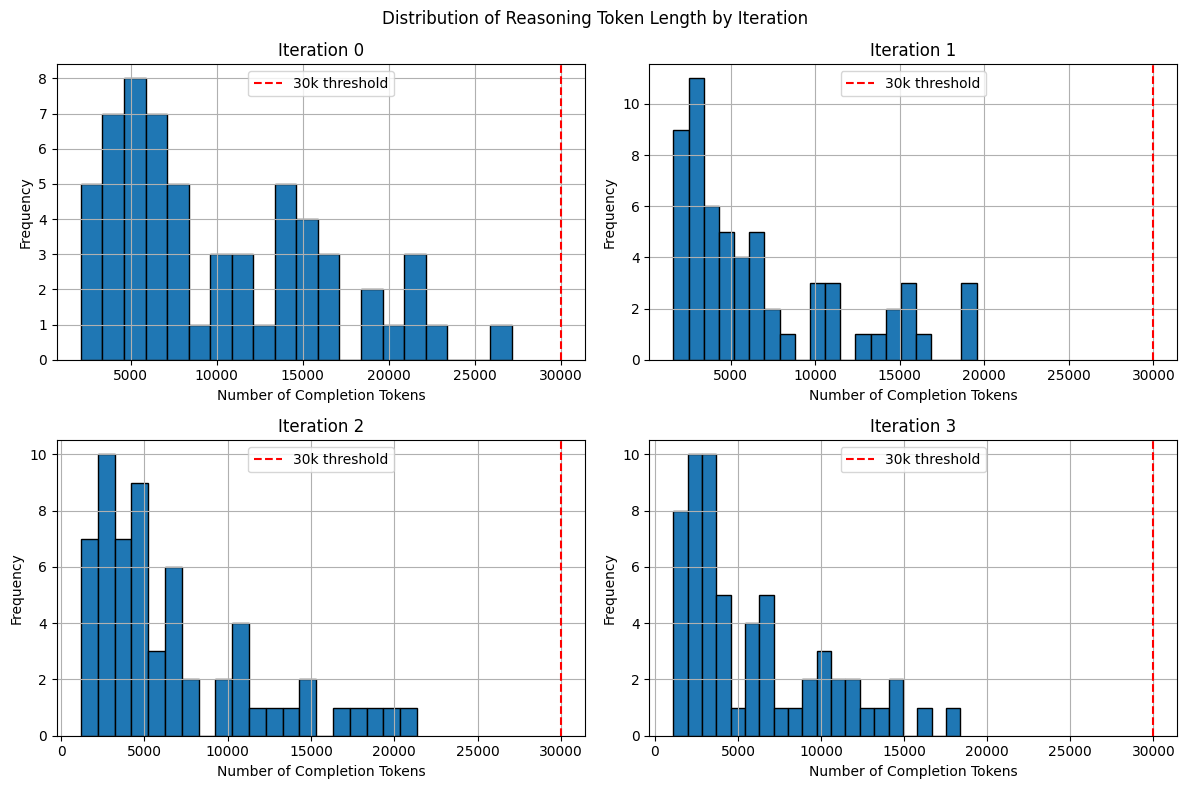

Iteration 1:
  Average tokens: 10060.82
  Cases over 30k: 0 out of 60 (0.0%)
Iteration 2:
  Average tokens: 6911.93
  Cases over 30k: 0 out of 60 (0.0%)
Iteration 3:
  Average tokens: 6751.95
  Cases over 30k: 0 out of 60 (0.0%)
Iteration 4:
  Average tokens: 5930.80
  Cases over 30k: 0 out of 60 (0.0%)


In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

# Track counts of tokens exceeding 30k
over_30k_counts = {i: 0 for i in range(4)}
total_counts = {i: 0 for i in range(4)}

sus_30k = set()

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
            total_counts[iter_num] += 1
            if tokens > 30000:
                over_30k_counts[iter_num] += 1
                sus_30k.add((problem_idx, iter_num))
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create histogram subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Reasoning Token Length by Iteration')

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].hist(iter_tokens[i], bins=20, edgecolor='black')
    axes[row, col].axvline(x=30000, color='r', linestyle='--', label='30k threshold')
    axes[row, col].set_title(f'Iteration {i}')
    axes[row, col].set_xlabel('Number of Completion Tokens')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# Print average and >30k stats for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    pct_over_30k = (over_30k_counts[i] / total_counts[i]) * 100 if total_counts[i] > 0 else 0
    print(f"Iteration {i+1}:")
    print(f"  Average tokens: {avg:.2f}")
    print(f"  Cases over 30k: {over_30k_counts[i]} out of {total_counts[i]} ({pct_over_30k:.1f}%)")

In [47]:
# Track counts of length vs stop finish reasons for each iteration
length_counts = {i: 0 for i in range(4)}
total_counts = {i: 0 for i in range(4)}

sus_fin_reason = set()

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            finish_reason = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['final_finish_reason']
            total_counts[iter_num] += 1
            if finish_reason == "length":
                print(f"finish reason length for problem {problem_idx}, iteration {iter_num}")
                sus_fin_reason.add((problem_idx, iter_num))
                length_counts[iter_num] += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Print stats for each iteration
for i in range(4):
    pct_length = (length_counts[i] / total_counts[i]) * 100 if total_counts[i] > 0 else 0
    print(f"Iteration {i+1}:")
    print(f"  Cases hitting length limit: {length_counts[i]} out of {total_counts[i]} ({pct_length:.1f}%)")

Iteration 1:
  Cases hitting length limit: 0 out of 60 (0.0%)
Iteration 2:
  Cases hitting length limit: 0 out of 60 (0.0%)
Iteration 3:
  Cases hitting length limit: 0 out of 60 (0.0%)
Iteration 4:
  Cases hitting length limit: 0 out of 60 (0.0%)


In [48]:
results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_reasoning'][-1]

{'num_api_calls': 1,
 'num_continuations': 0,
 'total_token_usage': {'prompt_tokens': 143,
  'completion_tokens': 3355,
  'total_tokens': 3498},
 'total_cost_info': {'prompt_cost': 0.0,
  'completion_cost': 0.0,
  'total_cost': 0.0},
 'total_text_length': 9283,
 'final_finish_reason': 'stop'}

In [49]:
len(sus_fin_reason), len(sus_30k)

(0, 0)

In [50]:
sus_fin_reason - sus_30k

set()

In [51]:
from collections import Counter

completion_tokens_counter = Counter()
iteration_counter = Counter()
problems_in_question = set()

for problem_idx, iter_num in sus_fin_reason:
    print(f"==== problem {problem_idx}, iteration {iter_num} ====")
    problem_id = results["results"][problem_idx]["problem_id"]
    print(f"problem id: {problem_id}")
    print(results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1])
    completion_tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
    completion_tokens_counter[completion_tokens] += 1
    iteration_counter[iter_num] += 1

    if completion_tokens < 30000:
        problems_in_question.add((problem_id, iter_num))

    print(f"completion tokens: {completion_tokens}")
    print("="*100)

In [52]:
completion_tokens_counter

Counter()

In [53]:
iteration_counter

Counter()

In [54]:
problems_in_question

set()

In [55]:
"--question_ids=" + ",".join([pid for pid, iter_num in problems_in_question if pid != "14"])

'--question_ids='

In [56]:
iter_0_bug_qs = set()

for problem_id, iter_num in problems_in_question:
    if iter_num == 0:
        print(problem_id)
        iter_0_bug_qs.add(problem_id)


In [57]:
improve_qs = {"11", "13", "2024-I-15", "2024-I-5", "2024-II-12", "2024-II-2", "22", "26", "9"}
len(improve_qs)

9

In [58]:
improve_qs & iter_0_bug_qs

set()

In [59]:
piq_iters_counter = Counter()
for problem_id, iter_num in problems_in_question:
    piq_iters_counter[iter_num] += 1
piq_iters_counter


Counter()

In [60]:
for iter_num in range(4):
    print(f"Iteration {iter_num}: {piq_iters_counter[iter_num]} problems")


Iteration 0: 0 problems
Iteration 1: 0 problems
Iteration 2: 0 problems
Iteration 3: 0 problems


In [61]:
# results["results"][54]["detailed_metrics"][f'iteration_{0}_reasoning'][-1]
# results["results"][54]

compression rate

In [62]:
rzn_count = results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_reasoning'][-1]['total_token_usage']['completion_tokens']
sum_count = results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_summary'][-1]['total_token_usage']['completion_tokens']
compression_rate = sum_count / rzn_count
print(f"Compression rate: {compression_rate:.2f}")

Compression rate: 0.06


In [63]:
total_tokens = 0
count = 0

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            rzn_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            sum_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            compression_rate = sum_count / rzn_count
            total_tokens += compression_rate
            count += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

average_compression_rate = total_tokens / count if count > 0 else 0
print(f"Average compression rate: {average_compression_rate:.2f}")

Average compression rate: 0.10


/var/folders/8y/j9pbnmqj2t1bn5kv9ps9lg680000gn/T/ipykernel_14363/652421588.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])


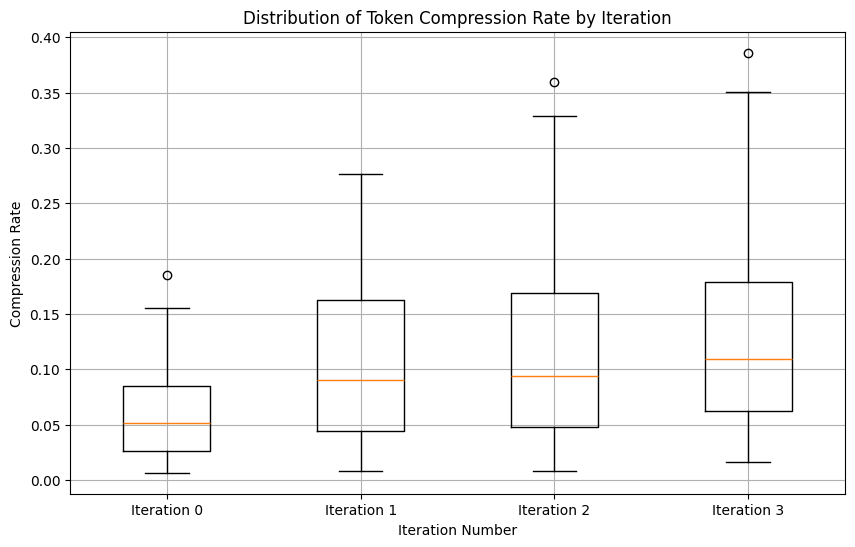

Average compression rate for iteration 1: 0.06
Average compression rate for iteration 2: 0.10
Average compression rate for iteration 3: 0.11
Average compression rate for iteration 4: 0.13


In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            rzn_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            sum_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            compression_rate = sum_count / rzn_count
            iter_tokens[iter_num].append(compression_rate)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create box plot
plt.figure(figsize=(10, 6))
box_data = [iter_tokens[i] for i in range(4)]
plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])
plt.title('Distribution of Token Compression Rate by Iteration')
plt.xlabel('Iteration Number') 
plt.ylabel('Compression Rate')
plt.grid(True)
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average compression rate for iteration {i+1}: {avg:.2f}")